In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import cv2 as cv

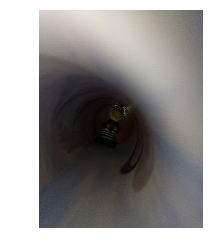

In [2]:
im = imageio.imread("res/caja2.jpg")
plt.imshow(im,cmap="gray")
plt.axis("off")
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


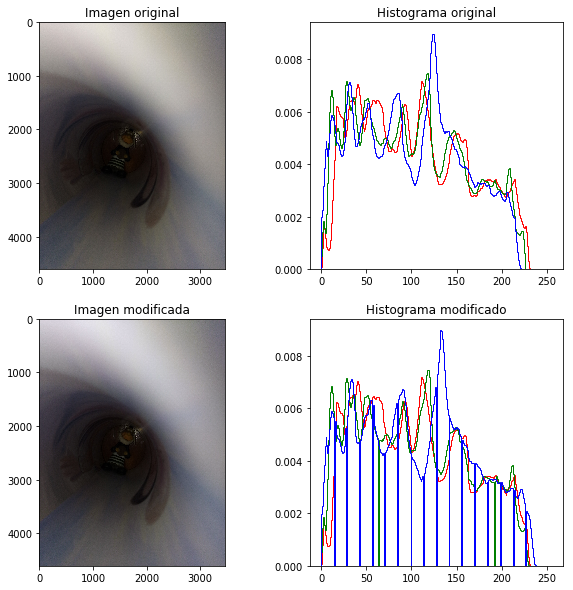

In [1]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función expansión del histograma cuyo parámetro es una imagen
def histogram_expansion(img):
    
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros([img.shape[0], img.shape[1]], dtype=np.float32)
    
    #Extraer el mínimo y el máximo del conjunto de datos
    m = float(np.min(img))
    M = float(np.max(img))
    #Aplicar la función de expansión(normalización) y asegurar datos uint8
    res = (img-m)*255.0/(M-m)
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/caja2.jpg'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación expansión de histograma sobre la imagen de entrada
res = apply_f_on_rgb(img, histogram_expansion, [])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

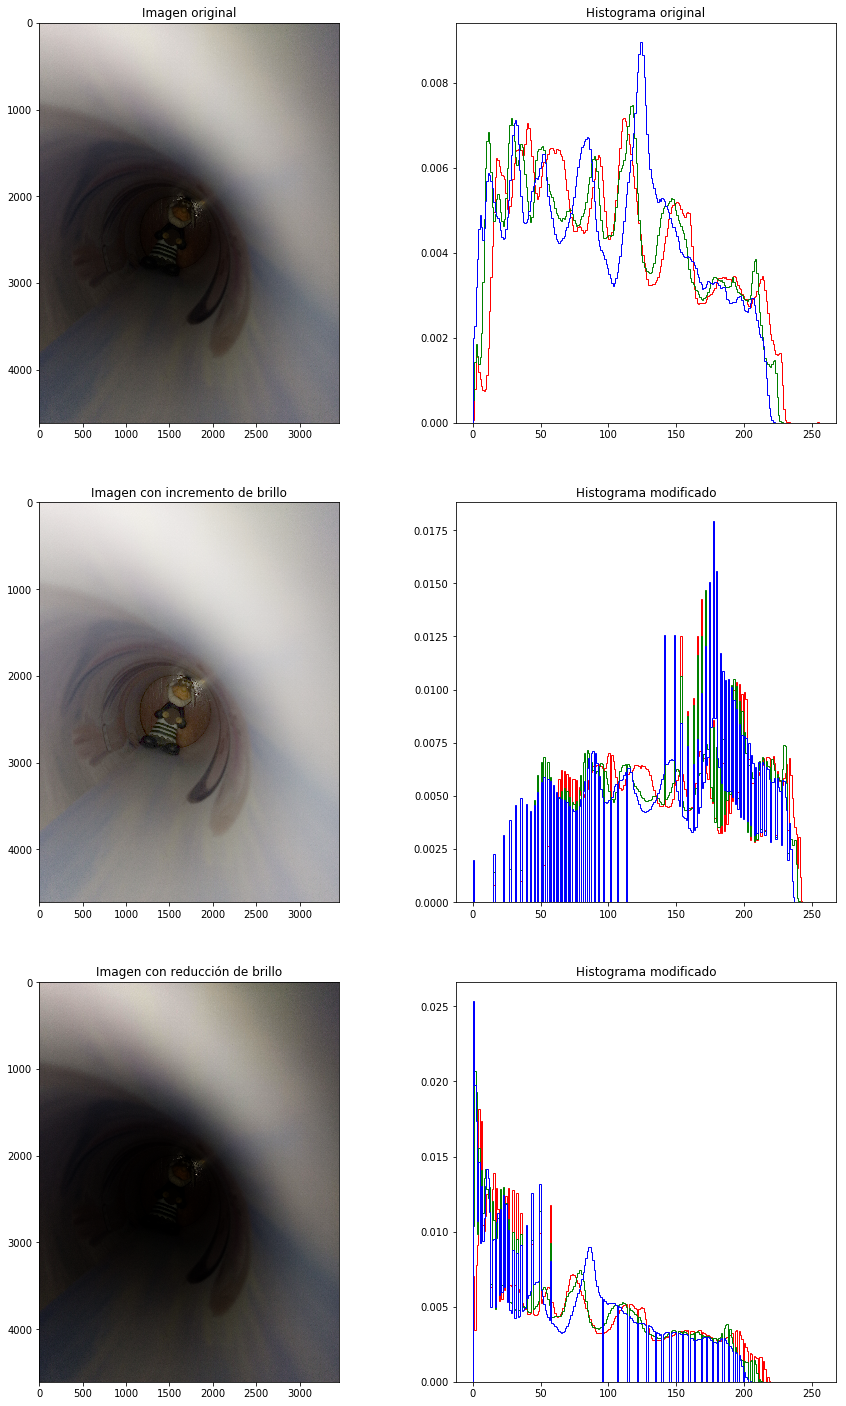

In [2]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/caja2.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

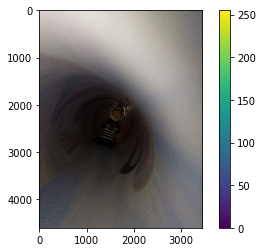

In [3]:
plt.imshow(im,vmin=0,vmax=255)
plt.colorbar()
plt.show()

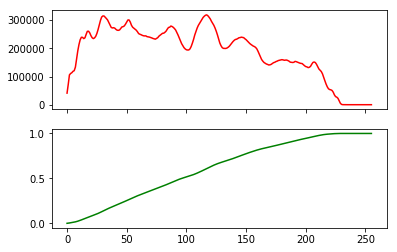

In [4]:
hist = ndi.histogram(im,min=0,max=255,bins=256)
cdf = hist.cumsum() / hist.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram',color="r")
axes[1].plot(cdf, label='CDF',color="g")
plt.show()

In [5]:
judio= np.where(im >= 50, 255, 0)

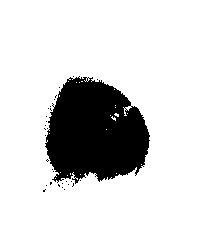

In [6]:
plt.imshow(judio[:,:,0],cmap="gray")
plt.axis("off")
plt.show()

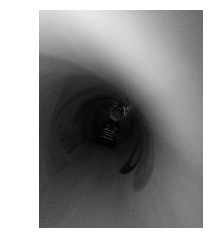

In [7]:
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.imshow(im_gray,cmap="gray")
plt.axis("off")
plt.show()

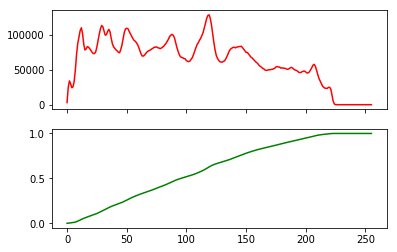

In [8]:
hist = ndi.histogram(im_gray,min=0,max=255,bins=256)
cdf = hist.cumsum() / hist.sum()
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram',color="r")
axes[1].plot(cdf, label='CDF',color="g")
plt.show()

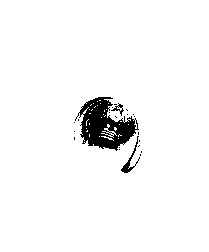

In [9]:
judio2= np.where(im_gray >= 15, 255, 0)
plt.imshow(judio2,cmap="gray")
plt.axis("off")
plt.show()

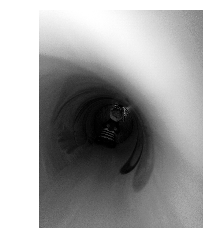

In [10]:
im_equalized = cdf[im_gray]*255
plt.imshow(im_equalized,cmap="gray")
plt.axis("off")
plt.show()

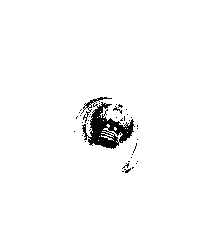

In [11]:
judio3 = np.where(im_equalized  >= 10, 255, im_gray,)
plt.imshow(judio3,cmap="gray")
plt.axis("off")
plt.show()

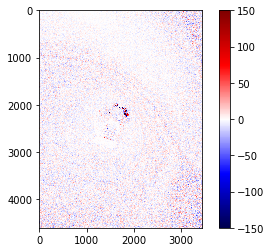

In [12]:
weights = [[1,0,-1], [1,0,-1], [1,0,-1]]
edges = ndi.convolve(im_equalized,weights)
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()

In [13]:
sobel_ax0 = ndi.sobel(im_gray, axis=0)
sobel_ax1 = ndi.sobel(im_gray, axis=1)

In [19]:
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))
edges

array([[ 2.828,  7.07 ,  3.162, ..., 14.56 , 15.62 ,  5.098],
       [ 7.07 ,  8.484,  6.324, ...,  8.25 ,  6.   , 13.93 ],
       [10.77 ,  4.473, 12.164, ...,  7.21 ,  8.25 , 11.4  ],
       ...,
       [12.96 ,  9.055,  6.   , ..., 14.21 , 10.3  , 10.3  ],
       [ 9.484,  2.   , 12.805, ...,  5.656, 12.65 , 12.086],
       [11.75 , 14.56 , 15.1  , ...,  3.162,  7.617,  6.324]],
      dtype=float16)

In [18]:
plt.imshow(edges,cmap="gray")
plt.axis("off")
plt.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [175]:
labels, nlabels = ndi.label(judio2)

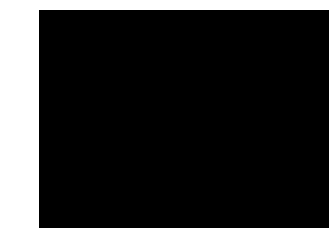

In [173]:
plt.imshow(labels,cmap="gray")
plt.axis("off")
plt.show()

In [151]:
boxes = ndi.find_objects(labels)

In [159]:
boxes[0]

(slice(0, 3456, None), slice(0, 4608, None))

array([1, 1, 1, ..., 1, 1, 1])

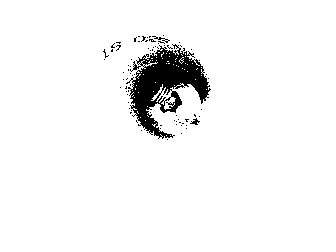

In [176]:
judio2= np.where(im_equalized >= 15, 255, 0)
plt.imshow(judio2,cmap="gray")
plt.axis("off")
plt.show()

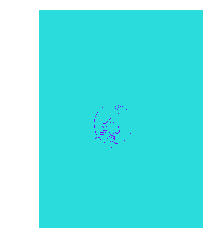

In [10]:
labels, nlabels = ndi.label(res)
plt.imshow(labels[:,:,2],cmap="rainbow")
plt.axis("off")
plt.show()

3